# BT2101 Deep Learning: Convolutional Neural Network

#### This notebook should run in Python 3.5+ version.

## 1 Goal

In this notebook, we will explore deep learning and Convolutional Neural Network. <br/>

First of all, students should understand machine learning basic knowledge. And then, students can expect to practice machine learning and deep learning models in Tensorflow. More information can be found at https://www.tensorflow.org/install/ and https://keras.io/.

Make sure you have already installed tensorflow in your computing, and then you are able to install Keras. **Note that Tensorflow only supports Python 3.5+ version.** If you installed Python 2.7 version in your computer, you could:
* Create a new virtual environment with Python 3.5+ in Anaconda 
* Activate this virtual environment
* Install Tensorflow CPU version in this virtual environment
* Open Python in this virtual environment and type `import tensorflow as tf`
* Installation of Tensorflow succeeds if there is not error message returns

In [1]:
# -*- coding:utf-8 -*-
# Set seed
from numpy.random import seed
seed(1)
# from tensorflow import set_random_seed
# set_random_seed(1)

In [2]:
# Check whether tensorflow is installed
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

C:\Users\bensj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


b'Hello, TensorFlow!'


## 2 Experiment Using Keras

### Case I: Multi-class Classification Using Fully-Connected Neural Network

**Remember in Tutorial 5, we contructed a fully-connected neural network model to do handwritten digit classification. Let us review it again.**

We are going to practice with handwritten digital from MINIST dataset, which is the representative data to explore machine learning techniques. We are going to practice to learn the basics of Keras by walking through a simple example: MINIST consists of $28\times28$ grayscale images of handwritten digits like these:

<img src="https://cdn-images-1.medium.com/max/1600/1*_4Ua9Zp84He8OxlZ4cy0DQ@2x.png" width="500">

The dataset also includes labels for each image, telling us which digit it is. For example, the labels for the above images are 5, 0, 4, and 1.

In [3]:
# Load packages
import numpy as np
import scipy
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
# Load the MNIST data
from keras.datasets import mnist

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Ths X data is a 3D Array (images, width, height) of grayscale values. To prepare the data for training, we should convert the 3D Array to matrices by reshaping width and height into a single dimension (i.e., $28\times28$ images are flatterned into length 784 vectors). Then, we rescale the grayscale values from integers ranging between 0 to 255 into floating point values ranging between 0 and 1.

In [5]:
x_train_new = x_train.reshape(x_train.shape[0], 784) / 255
x_test_new = x_test.reshape(x_test.shape[0], 784) / 255

The y data is an integer vector with values ranging from 0 to 9. To prepare this data for training we should encode the vectors into binary class matrices using the Keras function `to_categorical()`.

In [6]:
y_train_new = keras.utils.to_categorical(y_train, 10)
y_test_new = keras.utils.to_categorical(y_test, 10)

In [7]:
# Then we can try the sequential model
model = Sequential()

# First hidden layer
model.add(Dense(units=256, activation='relu', input_dim=784))
model.add(Dropout(0.4))

# Second hidden layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(units=10, activation='sigmoid'))

# The argument for the first layer specifies the shape of the input data (a length 784 numeric vector representing a grayscale image). 
# The final layer outputs a length 10 numeric vector (probabilities for each digit) using a softmax activation function.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


#### Some activation functions:

<img src="https://cdn-images-1.medium.com/max/1600/1*p_hyqAtyI8pbt2kEl6siOQ.png" width="900">

In [8]:
# Then we can compile the model with appropriate loss function, optimizer and metrics 
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.rmsprop(), metrics=['accuracy'])

In [9]:
# Train the model with 30 epochs and batches of 128 images
history = model.fit(x_train_new, y_train_new, epochs=15, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 2s 35us/step - loss: 0.5209 - acc: 0.8446 - val_loss: 0.1922 - val_acc: 0.9441
Epoch 2/15
48000/48000 [==============================] - 1s 29us/step - loss: 0.2195 - acc: 0.9354 - val_loss: 0.1259 - val_acc: 0.9654
Epoch 3/15
48000/48000 [==============================] - 1s 28us/step - loss: 0.1691 - acc: 0.9494 - val_loss: 0.1101 - val_acc: 0.9687
Epoch 4/15
48000/48000 [==============================] - 1s 26us/step - loss: 0.1397 - acc: 0.9597 - val_loss: 0.1060 - val_acc: 0.9708
Epoch 5/15
48000/48000 [==============================] - 1s 30us/step - loss: 0.1231 - acc: 0.9631 - val_loss: 0.0917 - val_acc: 0.9746
Epoch 6/15
48000/48000 [==============================] - 1s 29us/step - loss: 0.1124 - acc: 0.9673 - val_loss: 0.0959 - val_acc: 0.9735
Epoch 7/15
48000/48000 [==============================] - 1s 28us/step - loss: 0.1004 - acc: 0.9710 - val_loss: 0.0972 - val_acc

In [10]:
# Evaluate model performance on test data
loss_and_metrics = model.evaluate(x_test_new, y_test_new, batch_size=128)
loss_and_metrics #[loss, accuracy]

10000/10000 [==============================] - 0s 10us/step


[0.08290481954929418, 0.9806]

In [11]:
# Make predictions on test data
probabilities = model.predict(x_test_new, batch_size=128)
classes = probabilities.argmax(axis=-1)
classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

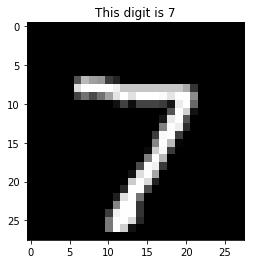

In [12]:
# What does the first image in x_test_new look like
# Whether we predict it correctly?
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

plt.imshow(np.array(x_test_new[0,:]).reshape((28, 28)), cmap="gray")
plt.title("This digit is %d" % classes[0])
plt.show()

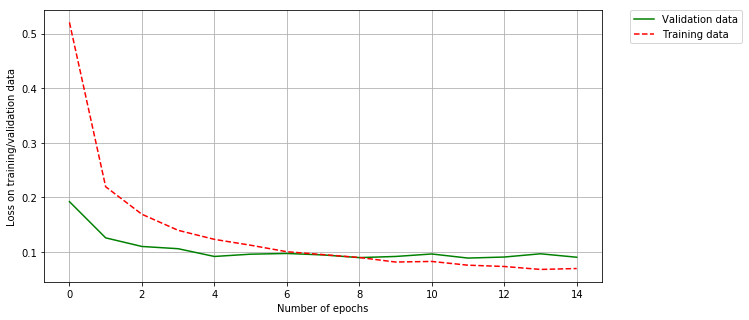

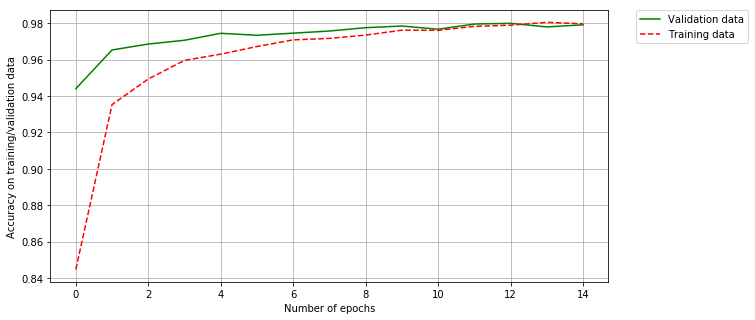

In [13]:
# Plot loss and accuracy 
fig = plt.figure(figsize=(10,5))

#plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['val_loss'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['loss'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Loss on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#plt.subplot(1, 2, 2)
fig = plt.figure(figsize=(10,5))
plt.plot(history.epoch, history.history['val_acc'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['acc'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Case II: Multi-class Classification Using Convolutional Neural Network (CNN)

We are going to practice with `Convolutional Neural Network`. You can compare it with fully-connected neural network model.

References: https://keras.io/layers/convolutional/

In [9]:
# import packages 
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [10]:
# Load the MNIST data
from keras.datasets import mnist

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
# Convert to 28*28*1 and normalize to [0, 1]
x_train_new = x_train.reshape(x_train.shape[0], 28, 28, 1) / 255
x_test_new = x_test.reshape(x_test.shape[0], 28, 28, 1) / 255

In [12]:
# Transform the categorical output label into 10 binary output labels
y_train_new = keras.utils.to_categorical(y_train, 10)
y_test_new = keras.utils.to_categorical(y_test, 10)

In [13]:
# Build CNN model in a sequential way
model = Sequential()

# Input layer and convolution layer (with 32 different filters/kernels, each filter/kernel is 5*5 dimension)
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))

# Pooling layer: Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Set dropout rate to 0.2
model.add(Dropout(0.2))

# Flattern all pixels/neurons and generate a fully-connected layer
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))

# Output layer
model.add(Dense(units=10, activation='sigmoid'))

# The argument for the first layer specifies the shape of the input data (a length 784 numeric vector representing a grayscale image). 
# The final layer outputs a length 10 numeric vector (probabilities for each digit) using a softmax activation function.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Then we can compile the model with appropriate loss function, optimizer and metrics 
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.rmsprop(), metrics=['accuracy'])

In [20]:
# Train the model with 15 epochs and batches of 128 images
history = model.fit(x_train_new, y_train_new, epochs=15, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 19s 393us/step - loss: 0.2751 - acc: 0.9163 - val_loss: 0.0941 - val_acc: 0.9738
Epoch 2/15
48000/48000 [==============================] - 18s 379us/step - loss: 0.0737 - acc: 0.9773 - val_loss: 0.0583 - val_acc: 0.9823
Epoch 3/15
48000/48000 [==============================] - 19s 388us/step - loss: 0.0490 - acc: 0.9848 - val_loss: 0.0514 - val_acc: 0.9853
Epoch 4/15
48000/48000 [==============================] - 19s 395us/step - loss: 0.0365 - acc: 0.9889 - val_loss: 0.0437 - val_acc: 0.9862
Epoch 5/15
48000/48000 [==============================] - 19s 394us/step - loss: 0.0281 - acc: 0.9913 - val_loss: 0.0449 - val_acc: 0.9872
Epoch 6/15
48000/48000 [==============================] - 19s 390us/step - loss: 0.0236 - acc: 0.9925 - val_loss: 0.0356 - val_acc: 0.9899
Epoch 7/15
48000/48000 [==============================] - 19s 391us/step - loss: 0.0180 - acc: 0.9944 - val_loss: 0.

In [21]:
# Evaluate model performance on test data
loss_and_metrics = model.evaluate(x_test_new, y_test_new, batch_size=128)
loss_and_metrics #[loss, accuracy]

10000/10000 [==============================] - 1s 115us/step


[0.047894575044113666, 0.9895]

**You can see that test accuracy of CNN model is close to 99%**

In [22]:
# Make predictions on test data
probabilities = model.predict(x_test_new, batch_size=128)
classes = probabilities.argmax(axis=-1)
classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

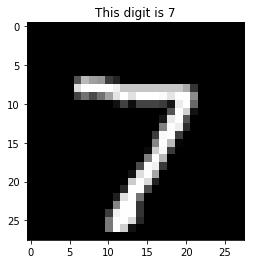

In [23]:
# What does the first image in x_test_new look like
# Whether we predict it correctly?
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

plt.imshow(np.array(x_test_new[0,:]).reshape((28, 28)), cmap="gray")
plt.title("This digit is %d" % classes[0])
plt.show()

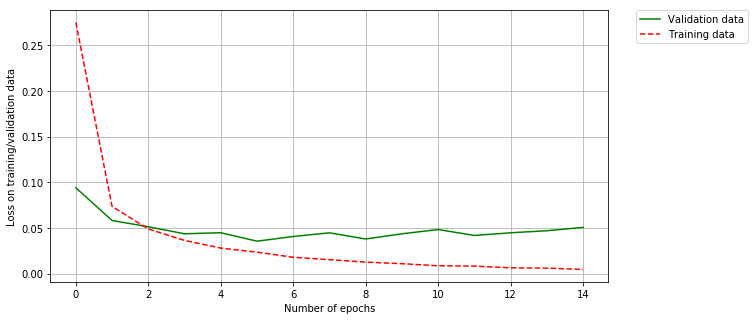

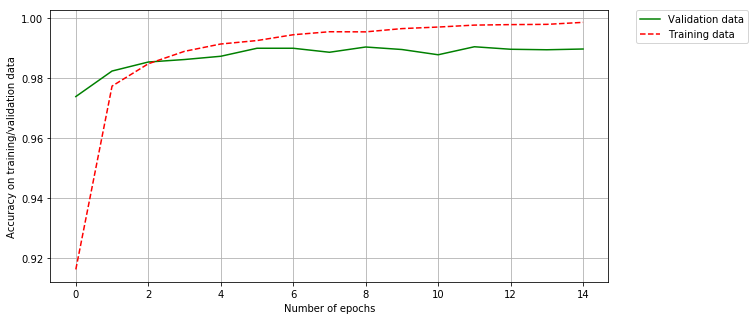

In [24]:
# Plot loss and accuracy 
fig = plt.figure(figsize=(10,5))

#plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['val_loss'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['loss'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Loss on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#plt.subplot(1, 2, 2)
fig = plt.figure(figsize=(10,5))
plt.plot(history.epoch, history.history['val_acc'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['acc'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [25]:
# Classification Report
# References: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report
target_names = ["Number {}".format(i) for i in range(10)]
print(classification_report(y_test, classes, target_names=target_names))

              precision    recall  f1-score   support

    Number 0       0.99      1.00      0.99       980
    Number 1       0.99      1.00      0.99      1135
    Number 2       0.98      0.99      0.99      1032
    Number 3       1.00      0.98      0.99      1010
    Number 4       0.99      0.99      0.99       982
    Number 5       0.98      0.99      0.99       892
    Number 6       0.99      0.98      0.99       958
    Number 7       0.99      0.99      0.99      1028
    Number 8       0.99      0.99      0.99       974
    Number 9       0.99      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Now it is your turn. Read Tensorflow and Keras documents and examples on deep learning model. Familiarize yourself with applications of convolutional neural network models. 

References: https://keras.io/layers/convolutional/

## 3 Assignments (5 points)

### Purpose: Familiarize yourself with Building Convolutional Neural Network Models in Tensorflow and Keras

#### Dataset on Hand Writen Digits: The same dataset used in Tutorial 3 Ensemble Learning. Remember in tutorials 3 and 5, the accuracy of single decision tree model is about 86%, bagging model 95%, random forest model 96%, fully-connected neural network model 95%. Let us check the performance of convolutional neural network model

**Dataset:**

The Kaggle competition dataset can be obtained from https://www.kaggle.com/c/digit-recognizer/data.

**Overview:**

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

**Acknowlegements:**

More details about the dataset, including algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html. The dataset is made available under a Creative Commons Attribution-Share Alike 3.0 license.

**Attributes:**

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

In [1]:
# Load packages
import numpy as np
import pandas as pd
import scipy
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\bensj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load dataset: You need to download dataset first
%pwd
train = pd.read_csv('./train.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# 42,000 pictures; Each picture is composed of 28*28 dimensional pixels
train.shape

(42000, 785)

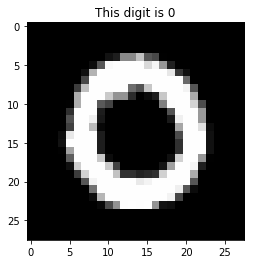

In [18]:
# What does an image look like
plt.imshow(np.array(train.iloc[1,1:]).reshape((28, 28)), cmap="gray")
plt.title("This digit is %d" % train.iloc[1,0])
plt.show()

In [4]:
# Transform features and outputs
# Convert X to 28*28*1 and normalize to [0, 1]
train_feature = train.iloc[:,1:].values.reshape(train.shape[0], 28, 28, 1) / 255

# Binarize output labels
train_target = keras.utils.to_categorical(train.iloc[:,0], 10)

train_feature

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

### Question 1. Create a convolutional neural network model, and show model performance (3 points)

#### Hint:
* Create a neural network in a sequential way
* Set the first convolutional layer Conv2D with 36 filters/kernels, while each filter/kernel is 3\*3 dimention: `Conv2D(36, (3, 3))`, `activation='relu'`, `input_shape=(28, 28, 1)`
* Set a maxpooling layer with 3\*3 dimension patches: `MaxPooling2D(pool_size=(3, 3))`
* Set another convolutional layer Conv2D with 24 filters/kernels, while each filter/kernel is 2\*2 dimention: `Conv2D(24, (2, 2))`, `activation='relu'`
* Set another maxpooling layer Conv2D with 2\*2 dimension patches: `MaxPooling2D(pool_size=(2, 2))`
* Set dropout rate to 0.1
* Flattern all pixels/neurons using `Flatten()`
* Generate a fully-connected layer with parameters: `units=128, activation='relu'`
* Generate another fully-connected layer with parameters: `units=50, activation='relu'`
* Set output layer with parameters: `units=10`, `activation='sigmoid'`
* Train the model with parameters: `epochs=20`, `batch_size=128`, `validation_split=0.3`
* Compile the model with parameters: `loss='categorical_crossentropy'`, `optimizer='sgd'`, `metrics=['accuracy']`
* Sample code:

```python

# Build CNN model in a sequential way
model = Sequential()

# Input layer and convolution layer (with 32 different filters/kernels, each filter/kernel is 5*5 dimension)
model.add(Conv2D(32, (7, 7), input_shape=(28, 28, 1), activation='relu'))

# Pooling layer: Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Set dropout rate to 0.2
model.add(Dropout(0.2))

# Flattern all pixels/neurons 
model.add(Flatten())

# Generate a fully-connected layer with 128 pixels/neurons
model.add(Dense(units=128, activation='relu'))

# Output layer
model.add(Dense(units=10, activation='sigmoid'))

# The argument for the first layer specifies the shape of the input data (a length 784 numeric vector representing a grayscale image). 
# The final layer outputs a length 10 numeric vector (probabilities for each digit) using a softmax activation function.
model.summary()

# Then we can compile the model with appropriate loss function, optimizer and metrics 
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.rmsprop(), metrics=['accuracy'])

# Train the model with 30 epochs and batches of 128 images
history = model.fit(x_train_new, y_train_new, epochs=30, batch_size=128, validation_split=0.3)

# Evaluate model performance on test data
loss_and_metrics = model.evaluate(x_test_new, y_test_new, batch_size=128)
loss_and_metrics #[loss, accuracy]

```

References: https://keras.io/activations/ and https://keras.io/layers/convolutional/

In [32]:
# Then we can try the sequential model
# Create a neural network in a sequential way
model = Sequential()

# Set the first convolutional layer Conv2D with 36 filters/kernels, while each filter/kernel is 3*3 dimention: 
# Conv2D(36, (3, 3)), activation='relu', input_shape=(28, 28, 1)
# Write your code here
model.add(Conv2D(36, (3, 3), input_shape=(28, 28, 1), activation='relu'))

# Set a maxpooling layer with 3*3 dimension patches: MaxPooling2D(pool_size=(3, 3))
# Write your code here
model.add(MaxPooling2D(pool_size=(3, 3)))

# Set another convolutional layer Conv2D with 24 filters/kernels, while each filter/kernel is 2*2 dimention: 
# Conv2D(24, (2, 2)), activation='relu'
# Write your code here
model.add(Conv2D(24, (2, 2), activation='relu'))

# Set another maxpooling layer Conv2D with 2*2 dimension patches: MaxPooling2D(pool_size=(2, 2))
# Write your code here
model.add(MaxPooling2D(pool_size=(2, 2)))

# Set dropout rate to 0.1
# Write your code here
model.add(Dropout(0.1))

# Flattern all pixels/neurons using Flatten()
# Write your code here
model.add(Flatten())

# Generate a fully-connected layer with parameters: units=128, activation='relu'
# Write your code here
model.add(Dense(units=128, activation='relu'))

# Generate another fully-connected layer with parameters: units=50, activation='relu'
# Write your code here
model.add(Dense(units=50, activation='relu'))

# Set output layer with parameters: units=10, activation='sigmoid'
# Write your code here
model.add(Dense(units=10, activation='sigmoid'))

# The argument for the first layer specifies the shape of the input data (a length 784 numeric vector representing a grayscale image). 
# The final layer outputs a length 10 numeric vector (probabilities for each digit) using a sigmoid activation function.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 36)        360       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 36)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 24)          3480      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 24)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 3, 3, 24)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 216)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               27776     
__________

In [33]:
# Then we can compile the model with appropriate loss function, optimizer and metrics 
# Write your code here
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [34]:
# Train the model with 30 epochs and batches of 128 images
# Write your code here
history = model.fit(train_feature, train_target, epochs=30, batch_size=128, validation_split=0.3)

Train on 29399 samples, validate on 12601 samples
Epoch 1/30
29399/29399 [==============================] - 19s 652us/step - loss: 2.2917 - acc: 0.1653 - val_loss: 2.2769 - val_acc: 0.2153
Epoch 2/30
29399/29399 [==============================] - 18s 626us/step - loss: 2.2604 - acc: 0.2152 - val_loss: 2.2280 - val_acc: 0.2434
Epoch 3/30
29399/29399 [==============================] - 18s 615us/step - loss: 2.1684 - acc: 0.2780 - val_loss: 2.0165 - val_acc: 0.4404
Epoch 4/30
29399/29399 [==============================] - 24s 805us/step - loss: 1.5344 - acc: 0.5496 - val_loss: 0.9386 - val_acc: 0.7415
Epoch 5/30
29399/29399 [==============================] - 24s 830us/step - loss: 0.8651 - acc: 0.7248 - val_loss: 0.6426 - val_acc: 0.7981
Epoch 6/30
29399/29399 [==============================] - 24s 808us/step - loss: 0.5822 - acc: 0.8204 - val_loss: 0.4104 - val_acc: 0.8799
Epoch 7/30
29399/29399 [==============================] - 24s 810us/step - loss: 0.4517 - acc: 0.8586 - val_loss: 0.

In [35]:
# Evaluate model performance on train data
loss_and_metrics = model.evaluate(train_feature, train_target, batch_size=128)
loss_and_metrics #[loss, accuracy]

42000/42000 [==============================] - 11s 273us/step


[0.11515739488317853, 0.9651666666666666]

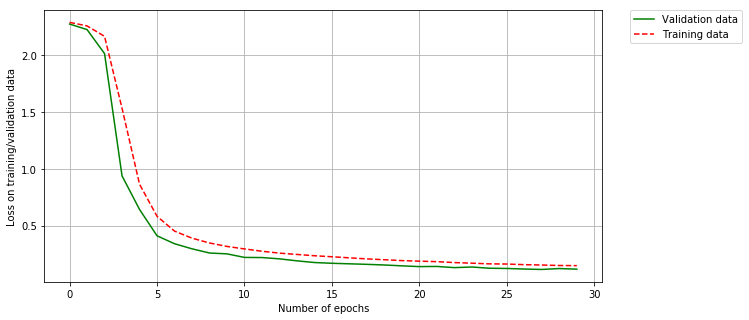

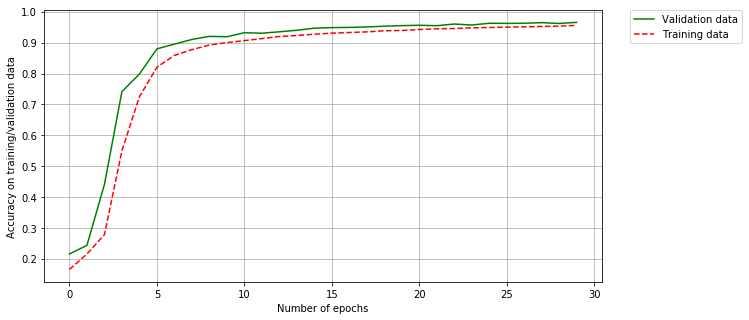

In [36]:
# Plot loss and accuracy 
fig = plt.figure(figsize=(10,5))

#plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['val_loss'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['loss'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Loss on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#plt.subplot(1, 2, 2)
fig = plt.figure(figsize=(10,5))
plt.plot(history.epoch, history.history['val_acc'], 'g-', label='Validation data')
plt.plot(history.epoch, history.history['acc'], 'r--', label='Training data')
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy on training/validation data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Question 2. Predictions on the test data (1 point)

#### Hint:

* Predict class labels using `predict` function
* Sample code:

```python

# Make predictions on test data
probabilities = model.predict(x_test_new, batch_size=128)
classes = probabilities.argmax(axis=-1)
classes

```

References: https://keras.io/models/model/

In [37]:
# Import test dataset
test = pd.read_csv('./test.csv')

# Transform features
test_feature = test.values.reshape(test.shape[0], 28, 28, 1) / 255

In [38]:
# Make predictions on test data
# Write your code here
probabilities = model.predict(test_feature, batch_size=128)
classes = probabilities.argmax(axis=-1)
classes

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

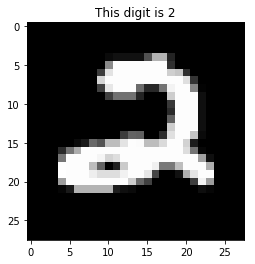

In [39]:
# What does the first image in test_feature look like
# Whether do we predict it correctly?
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

plt.imshow(np.array(test_feature[0]).reshape((28, 28)), cmap="gray")
plt.title("This digit is %d" % classes[0])
plt.show()

### Question 3. Why do we need to use pooling (or subsampling) in CNN, such as maxpooling? (1 point)

To reduce the number of parameters and computation. Since the dimension of the input is reduced (say, from a 9x9 grid to a 3x3 grid), lesser computation is required. By pooling, are still able to retain important information. This can be seen from the fact where when even though there is a small change in the original input, pooling still produces the same result. Different pooling methods such as averagel, max, min all have different functions. Max pooling extract important features while average pooling extract features smoothly.

## 4 References
[1] Chris Albon. (2018). Machine Learning with Python Cookbook. O'Reilly.